In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import log10
np.random.seed(50)

# Implement Algorithm

## Insertion Sort
- Array size = s
- Best Case = O(s)
    - All elements sorted in order, so each element only has 1 comparison
- Worst Case = O(s^2)
    - All elements sorted in reverse order, each element could require additional s comparisons

In [3]:
def insertionSort(nums, comparisons):
    for i in range(0, len(nums)):
        for j in range(i, 0, -1):
            if nums[j - 1] > nums[j]:
                comparisons[0] += 1
                nums[j - 1], nums[j] = nums[j], nums[j - 1]
            else:
                break
    return nums

## Merge Sort
- Array size = n
- Best Case = Worst Case = (n log(n / s))
    - Cost to merge = O(n)
    - Total arrays to merge = log(n / s)
    - Total cost = O(n * log(n / s))

In [4]:
def merge(left, right, comparisons):
    result = []
    l_ptr = r_ptr = 0

    while l_ptr < len(left) and r_ptr < len(right):
        comparisons[0] += 1
        if left[l_ptr] < right[r_ptr]:
            result.append(left[l_ptr])
            l_ptr += 1
        else:
            result.append(right[r_ptr])
            r_ptr += 1

    result += left[l_ptr:]
    result += right[r_ptr:]

    return result

def mergeSort(nums, comparisons):
    if len(nums) <= 1:
        return nums

    mid = len(nums) // 2
    left = mergeSort(nums[:mid], comparisons)
    right = mergeSort(nums[mid:], comparisons)

    return merge(left, right, comparisons)

## Hybrid (Merge + Insertion) Sort
- Best Case = O(n + n log(n / s))
    - Total cost of insertionSorts = (n / s) * s = O(n)
    - Total cost of mergeSorts = O(n log(n / s))
    - Total cost = O(n + n log(n / s))
- Worst Case = O(ns + n log(n / s))
    - Total cost of insertionSorts = (n / s) * s^2 = O(ns)
    - Total cost of mergeSorts = O(n log(n / s))
    - Total cost = O(ns + n log(n / s))

In [5]:
def hybridMerge(left, right, comparisons):
    result = []
    l_ptr = r_ptr = 0

    while l_ptr < len(left) and r_ptr < len(right):
        comparisons[0] += 1
        if left[l_ptr] < right[r_ptr]:
            result.append(left[l_ptr])
            l_ptr += 1
        else:
            result.append(right[r_ptr])
            r_ptr += 1

    result += left[l_ptr:]
    result += right[r_ptr:]

    return result

def hybridSort(nums, threshold, comparisons):
    if len(nums) <= threshold:
        return insertionSort(nums, comparisons)

    mid = len(nums) // 2
    left = hybridSort(nums[:mid], threshold, comparisons)
    right = hybridSort(nums[mid:], threshold, comparisons)

    return hybridMerge(left, right, comparisons)

# Generate Input Data

In [6]:
def generateList(size):
    nums = np.arange(1, (size + 1), 1)   # Generate list of pre-generated length, then shuffle it
    np.random.shuffle(nums)
    return list(nums)

In [6]:
start, end = 1000, 10000000
list_qty = 10
list_lengths = np.linspace(start, end, list_qty).astype(int)   # Generate a list of possible lengths
list_lengths

array([    1000,  1112000,  2223000,  3334000,  4445000,  5556000,
        6667000,  7778000,  8889000, 10000000])

# Analyze Time Complexity

In [7]:
def getComplexities(varying, fixed, mode):
    if mode == 'length':    
        x = np.arange(1, varying, 1)    # fixed threshold
        yBest = [i + i * log10(i / fixed) for i in x]   # 
        yWorst = [i * fixed + i * log10(i / fixed) for i in x]
        return x, yBest, yWorst
    
    x = np.arange(1, varying, 1)    # fixed input length
    yBest = [fixed + fixed * log10(fixed / i) for i in x]
    yWorst = [fixed * i + fixed * log10(fixed / i) for i in x]
    return x, yBest, yWorst

In [11]:
def plotResults(results, xlabel, title):
    fig, (ax1, ax2) = plt.subplots(
        figsize=(20, 7),
        ncols=2
    )

    elements = [item for item in results]
    comparisons = [results[item]['comparisons'] for item in results]
    time = [results[item]['time'] for item in results]
    
    ax1.plot(elements, comparisons, label='Actual Comparison')
    ax1.set_title(f'Number of Key Comparisons against {xlabel}')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Number of Key Comparisons')
    ax1.legend()

    ax2.plot(elements, time, label='Actual Time')
    ax2.set_title(f'Algorithm Runtime against {xlabel}')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Algorithm Runtime (s)')
    ax2.legend()

    plt.suptitle(title)
    plt.tight_layout()

    return fig, (ax1, ax2)

## (i) Fixed Threshold Value

In [9]:
fixed_threshold_results = {}
threshold = 100

for item in list_lengths:
    comparisons = [0]
    hybrid_input = generateList(item)
    start_time = dt.datetime.now()
    hybridSort(hybrid_input, threshold, comparisons)    # Sort the list using the hybridSort, count comparisons and record time taken
    end_time = dt.datetime.now()

    fixed_threshold_results[item] = {
        'comparisons': comparisons[0],
        'time': (end_time - start_time).total_seconds(),
    }
    print(f'Hybrid Sorted {item} elements')

fixed_threshold_results

Hybrid Sorted 1000 elements
Hybrid Sorted 1112000 elements
Hybrid Sorted 2223000 elements
Hybrid Sorted 3334000 elements
Hybrid Sorted 4445000 elements
Hybrid Sorted 5556000 elements
Hybrid Sorted 6667000 elements
Hybrid Sorted 7778000 elements
Hybrid Sorted 8889000 elements
Hybrid Sorted 10000000 elements


{1000: {'comparisons': 19188, 'time': 0.002908},
 1112000: {'comparisons': 34126660, 'time': 6.465969},
 2223000: {'comparisons': 70427001, 'time': 13.866099},
 3334000: {'comparisons': 94779266, 'time': 19.70923},
 4445000: {'comparisons': 145238602, 'time': 29.574726},
 5556000: {'comparisons': 205140352, 'time': 41.092248},
 6667000: {'comparisons': 196193767, 'time': 41.885282},
 7778000: {'comparisons': 245382239, 'time': 49.460573},
 8889000: {'comparisons': 299352506, 'time': 60.723732},
 10000000: {'comparisons': 357956677, 'time': 72.595314}}

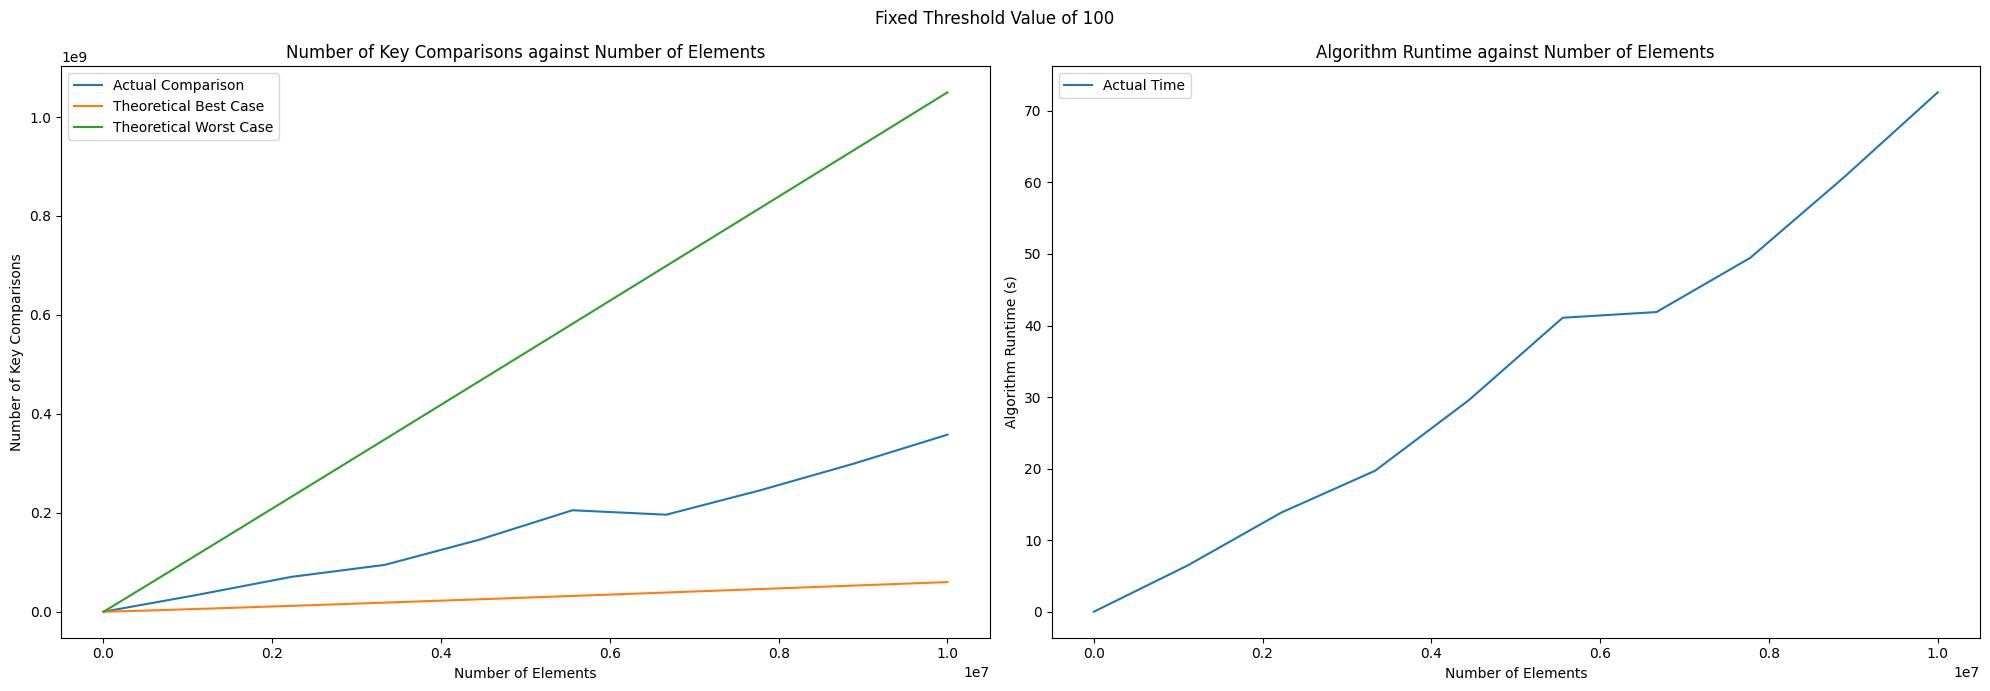

In [13]:
x, yBest, yWorst = getComplexities(list_lengths[-1], threshold, 'threshold')
fig, (ax1, ax2) = plotResults(fixed_threshold_results, 'Number of Elements', f'Fixed Threshold Value of {threshold}')
ax1.plot(x, yBest, label='Theoretical Best Case')
ax1.plot(x, yWorst, label='Theoretical Worst Case')
ax1.legend()

## (ii) Fixed Input Size

In [14]:
fixed_input_results = {}
possible_thresholds = np.linspace(2, 1000, 20).astype(int)
input_length = 1000000
input_list = generateList(input_length)

for item in possible_thresholds:
    comparisons = [0]
    hybrid_input = input_list.copy()
    start_time = dt.datetime.now()
    hybridSort(hybrid_input, item, comparisons)    # Sort the list using the hybridSort, count comparisons and record time taken
    end_time = dt.datetime.now()

    fixed_input_results[item] = {
        'comparisons': comparisons[0],
        'time': (end_time - start_time).total_seconds(),
    }
    print(f'Hybrid Sorted {input_length} elements with threshold of {item}')

fixed_input_results

Hybrid Sorted 1000000 elements with threshold of 2
Hybrid Sorted 1000000 elements with threshold of 54
Hybrid Sorted 1000000 elements with threshold of 107
Hybrid Sorted 1000000 elements with threshold of 159
Hybrid Sorted 1000000 elements with threshold of 212
Hybrid Sorted 1000000 elements with threshold of 264
Hybrid Sorted 1000000 elements with threshold of 317
Hybrid Sorted 1000000 elements with threshold of 369
Hybrid Sorted 1000000 elements with threshold of 422
Hybrid Sorted 1000000 elements with threshold of 474
Hybrid Sorted 1000000 elements with threshold of 527
Hybrid Sorted 1000000 elements with threshold of 579
Hybrid Sorted 1000000 elements with threshold of 632
Hybrid Sorted 1000000 elements with threshold of 684
Hybrid Sorted 1000000 elements with threshold of 737
Hybrid Sorted 1000000 elements with threshold of 789
Hybrid Sorted 1000000 elements with threshold of 842
Hybrid Sorted 1000000 elements with threshold of 894
Hybrid Sorted 1000000 elements with threshold of 

{2: {'comparisons': 18436959, 'time': 4.682409},
 54: {'comparisons': 22314694, 'time': 4.975741},
 107: {'comparisons': 28964027, 'time': 6.679676},
 159: {'comparisons': 43257098, 'time': 8.101385},
 212: {'comparisons': 43257098, 'time': 7.515607},
 264: {'comparisons': 72806205, 'time': 11.655933},
 317: {'comparisons': 72806205, 'time': 11.812799},
 369: {'comparisons': 72806205, 'time': 11.965961},
 422: {'comparisons': 72806205, 'time': 11.611994},
 474: {'comparisons': 72806205, 'time': 12.099393},
 527: {'comparisons': 132860029, 'time': 22.084153},
 579: {'comparisons': 132860029, 'time': 21.919136},
 632: {'comparisons': 132860029, 'time': 21.020583},
 684: {'comparisons': 132860029, 'time': 21.98583},
 737: {'comparisons': 132860029, 'time': 20.498389},
 789: {'comparisons': 132860029, 'time': 21.447664},
 842: {'comparisons': 132860029, 'time': 21.093077},
 894: {'comparisons': 132860029, 'time': 21.578466},
 947: {'comparisons': 132860029, 'time': 21.692261},
 1000: {'com

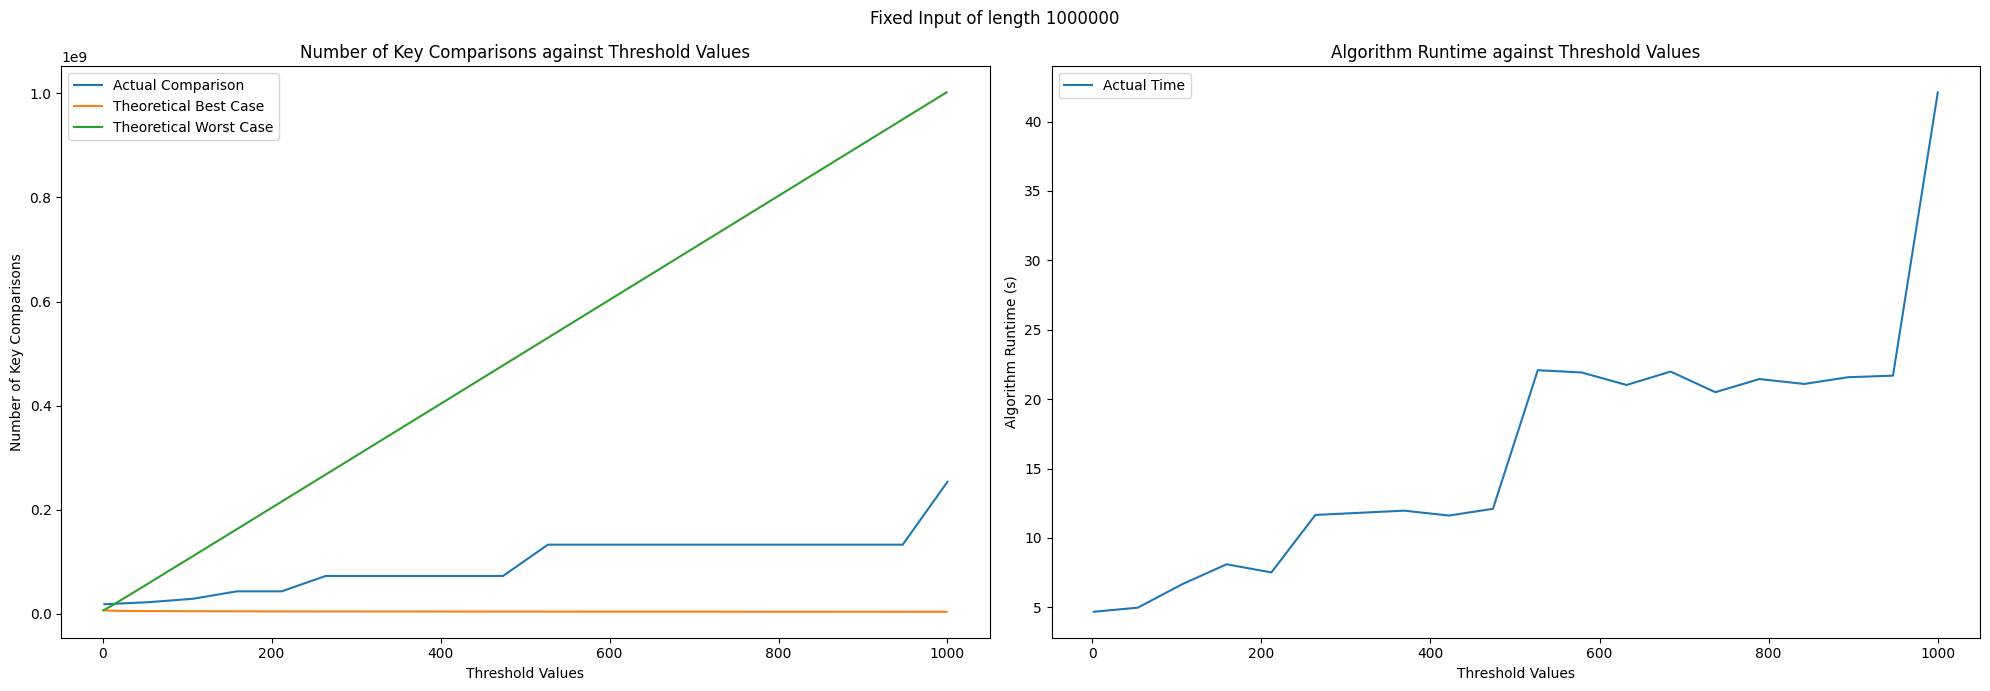

In [15]:
x, yBest, yWorst = getComplexities(possible_thresholds[-1], input_length, 'threshold')
fig, (ax1, ax2) = plotResults(fixed_input_results, 'Threshold Values', f'Fixed Input of length {input_length}')
ax1.plot(x, yBest, label='Theoretical Best Case')
ax1.plot(x, yWorst, label='Theoretical Worst Case')
ax1.legend()

## (iii) Obtain Optimal Threshold
- Sort a list of varying lengths using InsertionSort and plot the number of elements against runtime
- Sort a list of varying lengths using MergeSort and plot the number of elements against runtime
- Intersection of the 2 graphs will be optimal S

In [9]:
def getIntersection(elements1, bestFitTime1, elements2, bestFitTime2):    # Interpolate the best fit lines
    f1 = interp1d(elements1, bestFitTime1(elements1), kind='cubic')
    f2 = interp1d(elements2, bestFitTime2(elements2), kind='cubic')

    intersection_x = np.linspace(max(min(elements1), min(elements2)), min(max(elements1), max(elements2)), 1000)     # Find the intersection point using NumPy functions
    intersection_y1 = f1(intersection_x)
    intersection_y2 = f2(intersection_x)

    intersection_points = intersection_x[np.where(np.abs(intersection_y1 - intersection_y2) == np.min(np.abs(intersection_y1 - intersection_y2)))]     # Find the intersection point(s)

    if len(intersection_points) > 0:
        smallest_intersection_point = int(np.min(np.ceil(intersection_points)))
    else:
        smallest_intersection_point = None

    return smallest_intersection_point

In [8]:
def runtimeComparison(results1, label1, results2, label2, xlabel, title, fit_degree):
    fig, (ax1, ax2) = plt.subplots(
        figsize=(20, 7),
        ncols=2,
    )

    bestFitX = np.linspace(1, list(results1.keys())[-1])

    elements1 = [item for item in results1]
    comparisons1 = [results1[item]['comparisons'] for item in results1]
    bestFitComparisons1 = np.poly1d(np.polyfit(elements1, comparisons1, fit_degree))
    time1 = [results1[item]['time'] for item in results1]
    bestFitTime1 = np.poly1d(np.polyfit(elements1, time1, fit_degree))

    elements2 = [item for item in results2]
    comparisons2 = [results2[item]['comparisons'] for item in results2]
    bestFitComparisons2 = np.poly1d(np.polyfit(elements2, comparisons2, fit_degree))
    time2 = [results2[item]['time'] for item in results2]
    bestFitTime2 = np.poly1d(np.polyfit(elements2, time2, fit_degree))

    ax1.plot(elements1, comparisons1, label=label1)
    ax1.plot(bestFitX, bestFitComparisons1(bestFitX), label=f'Best Fit for {label1}')
    ax1.plot(elements2, comparisons2, label=label2)
    ax1.plot(bestFitX, bestFitComparisons2(bestFitX), label=f'Best Fit for {label2}')
    ax1.set_title(f'Number of Key Comparisons against {xlabel}')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Number of Key Comparisons')
    ax1.legend()

    ax2.plot(elements1, time1, label=label1)
    ax2.plot(bestFitX, bestFitTime1(bestFitX), label=f'Best Fit for {label1}')
    ax2.plot(elements2, time2, label=label2)
    ax2.plot(bestFitX, bestFitTime2(bestFitX), label=f'Best Fit for {label2}')
    ax2.set_title(f'Algorithm Runtime against {xlabel}')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Algorithm Runtime (s)')
    ax2.legend()

    plt.suptitle(title)
    plt.tight_layout()

    comparison_intersection = getIntersection(elements1, bestFitComparisons1, elements2, bestFitComparisons2)
    runtime_intersection = getIntersection(elements1, bestFitTime1, elements2, bestFitTime2)

    print(f"Minimum Intersection using Key Comparisons = {comparison_intersection}")
    print(f"Minimum Intersection using RunTime = {runtime_intersection}")

    return comparison_intersection, runtime_intersection

In [7]:
start, end = 1, 1000
list_qty = 250
list_lengths = np.linspace(start, end, list_qty).astype(int)   # Generate a list of possible lengths

Minimum Intersection using Key Comparisons = 11
Minimum Intersection using RunTime = 37


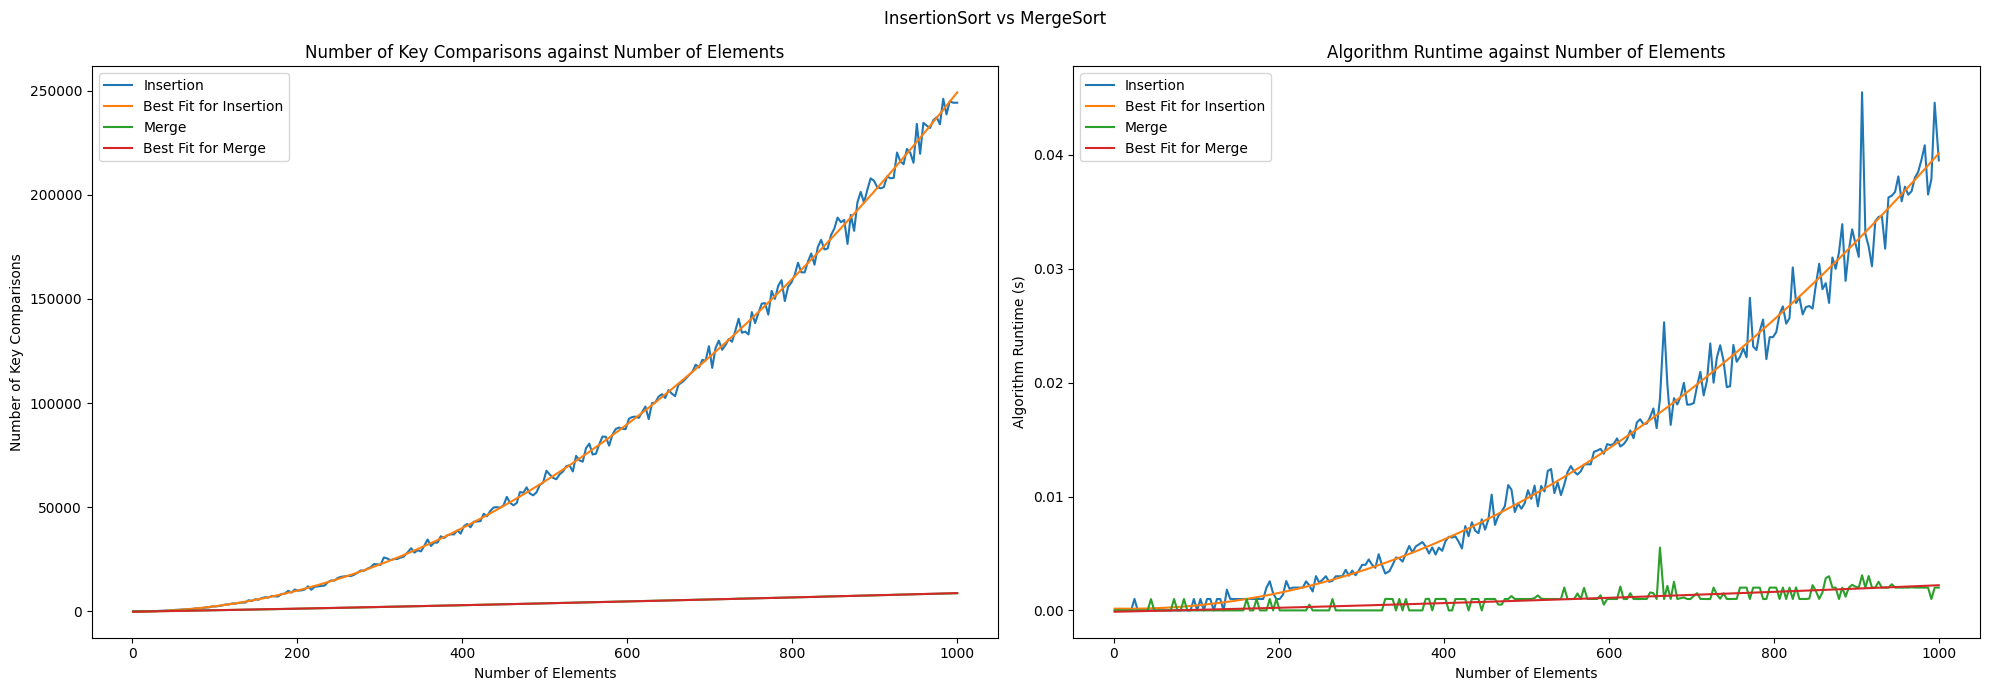

In [10]:
insertion_results = {}
merge_results = {}

for item in list_lengths:
    input_list = generateList(item)
    insertion_input, merge_input = input_list.copy(), input_list.copy()

    comparisons = [0]
    start_time = dt.datetime.now()
    insertionSort(insertion_input, comparisons)    # Sort the list using the hybridSort, count comparisons and record time taken
    end_time = dt.datetime.now()
    insertion_results[item] = {
        'comparisons': comparisons[0],
        'time': (end_time - start_time).total_seconds(),
    }

    comparisons = [0]
    start_time = dt.datetime.now()
    mergeSort(merge_input, comparisons)    # Sort the list using the hybridSort, count comparisons and record time taken
    end_time = dt.datetime.now()
    merge_results[item] = {
        'comparisons': comparisons[0],
        'time': (end_time - start_time).total_seconds(),
    }

comparison_intersection, runtime_intersection = runtimeComparison(insertion_results, 'Insertion', merge_results, 'Merge', 'Number of Elements', 'InsertionSort vs MergeSort', 2)

# Compare with Original Merge Sort
- Total runtime is a better indicator of overall algorithm performance compared to key comparisons.
- We will use the optimal S obtained from the intersection of the runtime graphs.

In [11]:
print(f'Optimal S = {runtime_intersection}')

Optimal S = 37


In [12]:
input_length = 10000000
input_list = generateList(input_length)

In [15]:
merge_result = {}

comparisons = [0]
merge_input = input_list.copy()
start_time = dt.datetime.now()
merge_list = mergeSort(merge_input, comparisons)    # Sort the list using the mergeSort, count comparisons and record time taken
end_time = dt.datetime.now()

merge_result['comparisons'] = comparisons[0]
merge_result['time'] = (end_time - start_time).total_seconds()

merge_result

{'comparisons': 220099447, 'time': 60.718756}

In [16]:
hybrid_result = {}

comparisons = [0]
hybrid_input = input_list.copy()
start_time = dt.datetime.now()
hybrid_list = hybridSort(hybrid_input, runtime_intersection, comparisons)    # Sort the list using the hybridSort, count comparisons and record time taken
end_time = dt.datetime.now()

hybrid_result['comparisons'] = comparisons[0]
hybrid_result['time'] = (end_time - start_time).total_seconds()

hybrid_result

{'comparisons': 234180323, 'time': 55.797618}